<a href="https://colab.research.google.com/github/mrunalini-ch/Deep-Learning/blob/main/DL__3rd_module_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB 3**

*Name: Chintham Mrunalini*

*Student ID: 22WU0104031*

*Date: 12.2.25*


***To implement and train a Convolutional Neural Network (CNN) model for classifying handwritten digits from the MNIST dataset. The lab consists of two main tasks:***

*3a. Building a basic CNN model*

*3b. Enhancing the CNN model using regularization and batch normalization*


**(3a)** ***Build a CNN Model for MNIST Classification***

**key features:**
1. loading and preprocessing the dataset of MNIST
2. basic CNN model is defined
3. We will compile and train that model
4. We will evaluate the model





**Step 1:** importing libraries, loading the dataset and normalizing it, reshaping it and converting the labels to categorical format

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalizing
x_train, x_test = x_train / 255.0, x_test / 255.0
#reshaping
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#converting
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Step 2:** importing the required liraries, since it is CNN, giving it the CNN model architecture.

**key features:**
1. ***feature extraction:*** the convolutional layers extract the features.
2. ***Dimensionality reduction:*** pooling layers reduce the size.
3. ***Non-linearty:*** ReLU improves the learning capability.
4. ***Multi-class classification:*** softmax outputs the class probabilities.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 3:** compiling an training the model.

**key features:**

1. Efficient optimization
2. multi-class classification
3. training visualization

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9132 - loss: 0.2869 - val_accuracy: 0.9867 - val_loss: 0.0421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9861 - loss: 0.0453 - val_accuracy: 0.9853 - val_loss: 0.0427
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9906 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9953 - loss: 0.0151 - val_accuracy: 0.9915 - val_loss: 0.0287


**Step 4:** evaluating the model and plotting the training and validation loss

**key features:**

1. model performance evaluation
2. visualization of training progress
3. overfitting detection


313/313 - 2s - 7ms/step - accuracy: 0.9915 - loss: 0.0287
Test accuracy: 0.9915000200271606


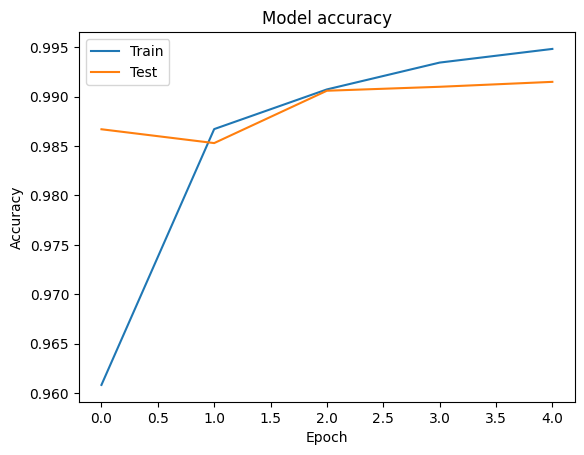

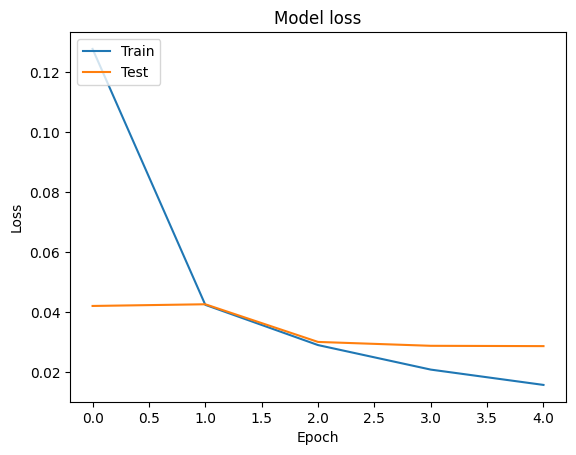

In [4]:
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**(3b)** ***Improve CNN Model Using Regularization and Batch Normalization***

**Step 1:** improving additional layers, regularization, updated CNN model, compilation and training of the improved model.

**key features:**
1. Better generalization
2. faster and stable training
3. reduced overfitting
4. higher accuracy

In [5]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

# Define the improved CNN model
model_improved = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Compile the improved model
model_improved.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_improved = model_improved.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.8534 - loss: 0.7504 - val_accuracy: 0.9810 - val_loss: 0.2513
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9632 - loss: 0.2950 - val_accuracy: 0.9811 - val_loss: 0.2187
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - accuracy: 0.9675 - loss: 0.2628 - val_accuracy: 0.9842 - val_loss: 0.2139
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 42ms/step - accuracy: 0.9702 - loss: 0.2576 - val_accuracy: 0.9850 - val_loss: 0.2128
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9712 - loss: 0.2584 - val_accuracy: 0.9864 - val_loss: 0.2086
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 45ms/step - accuracy: 0.9701 - loss: 0.2579 - val_accuracy: 0.9873 - val_loss: 0.2033
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9708 - loss: 0.2587 - val_accuracy: 0.9875 - val_loss: 0.1962
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 42ms/step - accuracy: 0.97

**Step 2:** evaluating the updated model and plotting the accuracy and loss comparisions

**key features:**

1. perforance comparision
2. overfitting detection
3. better generalization
4. training behaviour analysis

313/313 - 3s - 9ms/step - accuracy: 0.9855 - loss: 0.2036
Test accuracy after improvements: 0.9854999780654907


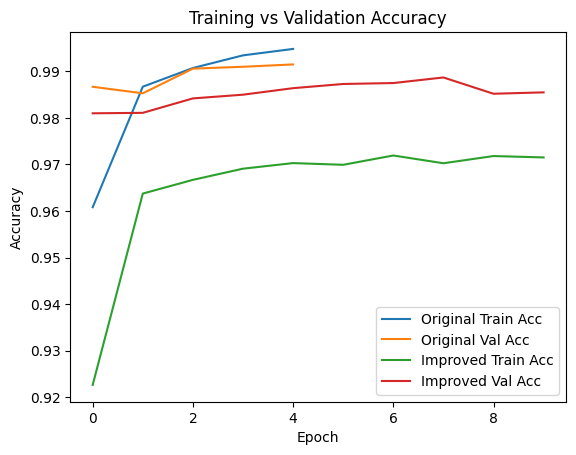

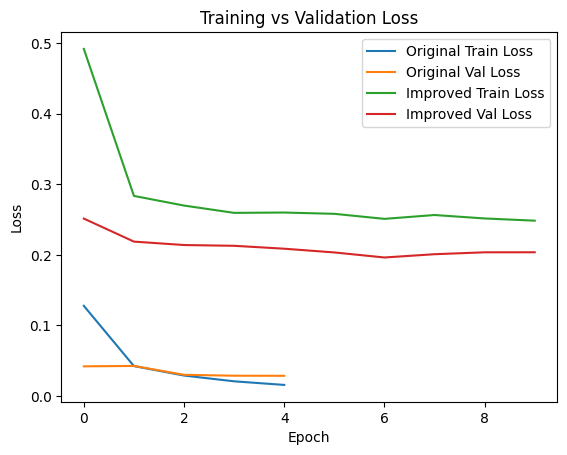

In [6]:
# Evaluate improved model
test_loss, test_acc = model_improved.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy after improvements: {test_acc}')

# Plot accuracy comparison
plt.plot(history.history['accuracy'], label='Original Train Acc')
plt.plot(history.history['val_accuracy'], label='Original Val Acc')
plt.plot(history_improved.history['accuracy'], label='Improved Train Acc')
plt.plot(history_improved.history['val_accuracy'], label='Improved Val Acc')
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss comparison
plt.plot(history.history['loss'], label='Original Train Loss')
plt.plot(history.history['val_loss'], label='Original Val Loss')
plt.plot(history_improved.history['loss'], label='Improved Train Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Val Loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
